In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('Customer.Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Replacing Blancks with "0" as tenure is "0" and no TotalCharge are recorded

In [3]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.duplicated().sum()

0

In [8]:
df["customerID"].duplicated().sum()

0

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df["SeniorCitizen "]=df["SeniorCitizen"].apply(conv)

In [10]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,SeniorCitizen
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,no
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,no
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,no
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,no
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,no


### Converted 0 and 1 values of sinor citizen to yes/no to make it easier to understand.

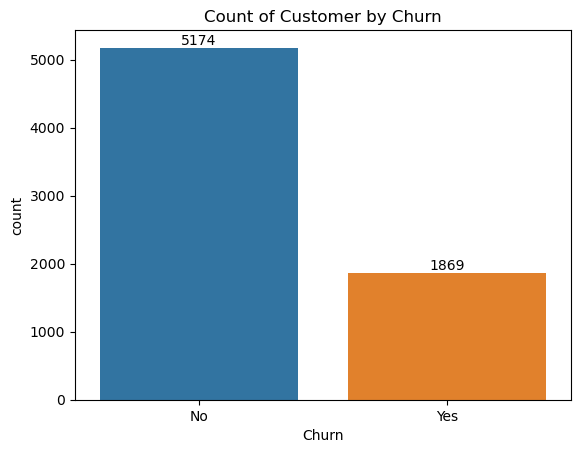

In [11]:
ax = sns.countplot(x= "Churn", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by Churn")
plt.show()

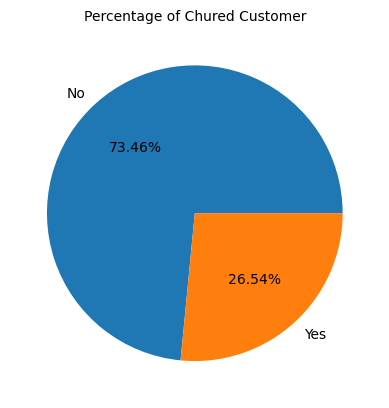

,Churn
Churn,
No,5174
Yes,1869


<Figure size 300x400 with 0 Axes>

In [12]:
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Chured Customer",fontsize = 10)
plt.show()
plt.figure(figsize = (3,4))
gb


### From above Pie chart we can conclude that 26.54% of our customers areed Churn out
## Let's explore resons behind that

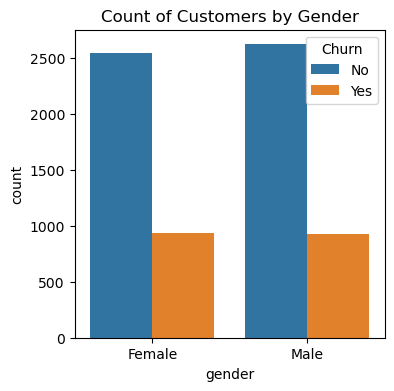

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x="gender",data=df , hue = "Churn")
plt.title("Count of Customers by Gender")
plt.show()

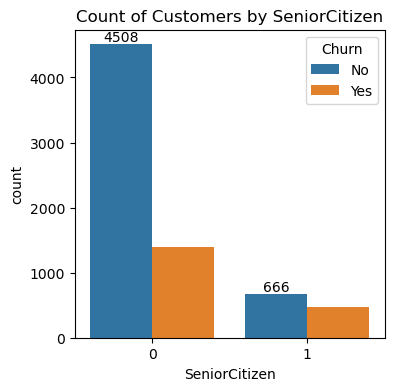

In [14]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x="SeniorCitizen",data=df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

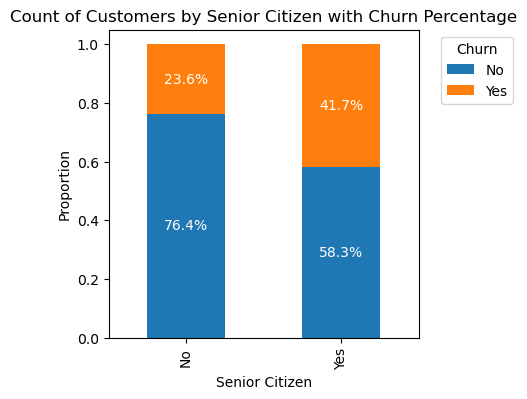

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample dataset (use your 'df' DataFrame here)
# Assuming 'SeniorCitizen' column has values 0 and 1 (0 = No, 1 = Yes)

# Map 'SeniorCitizen' from 0 and 1 to 'No' and 'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

# Calculate the percentage of churn within each 'SeniorCitizen' group
grouped_data = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Convert raw counts to percentages
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# Plot the stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(4,4), color=['#1f77b4', '#ff7f0e'])

# Add the percentages as labels on each section of the bars
for n, x in enumerate([*grouped_data.index]):
    for (i, val) in enumerate(grouped_data.loc[x]):
        plt.text(n, val / 2 + sum(grouped_data.loc[x][:i]), f'{val*100:.1f}%', ha='center', va='center', color='white')

# Set plot labels and title
plt.title("Count of Customers by Senior Citizen with Churn Percentage")
plt.xlabel("Senior Citizen")
plt.ylabel("Proportion")

# Move legend to the upper right side (outside the plot)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()


### Senior Citizens are at a higher risk of churning compared to Non-Senior Citizens.


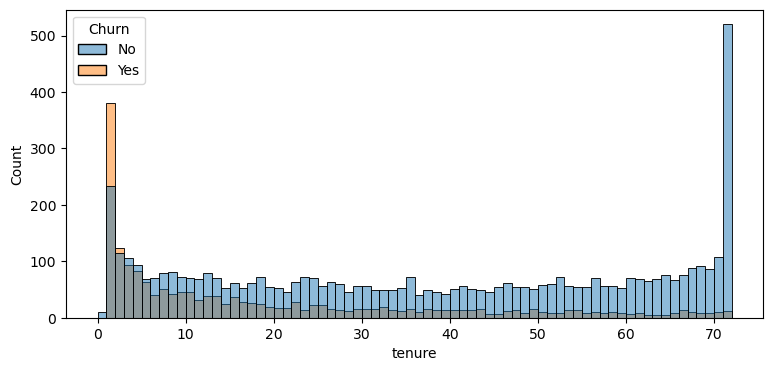

In [16]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue="Churn")
plt.show()

### People who have used our services for long time have stayed and people who have used our services 1 or 2 months have churn.

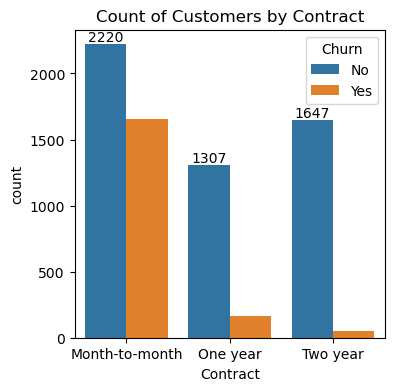

In [18]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df , hue = "Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

### People who have month to month contract who have churn then from who have 1 or 2 years of contract

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'SeniorCitizen '], dtype=object)

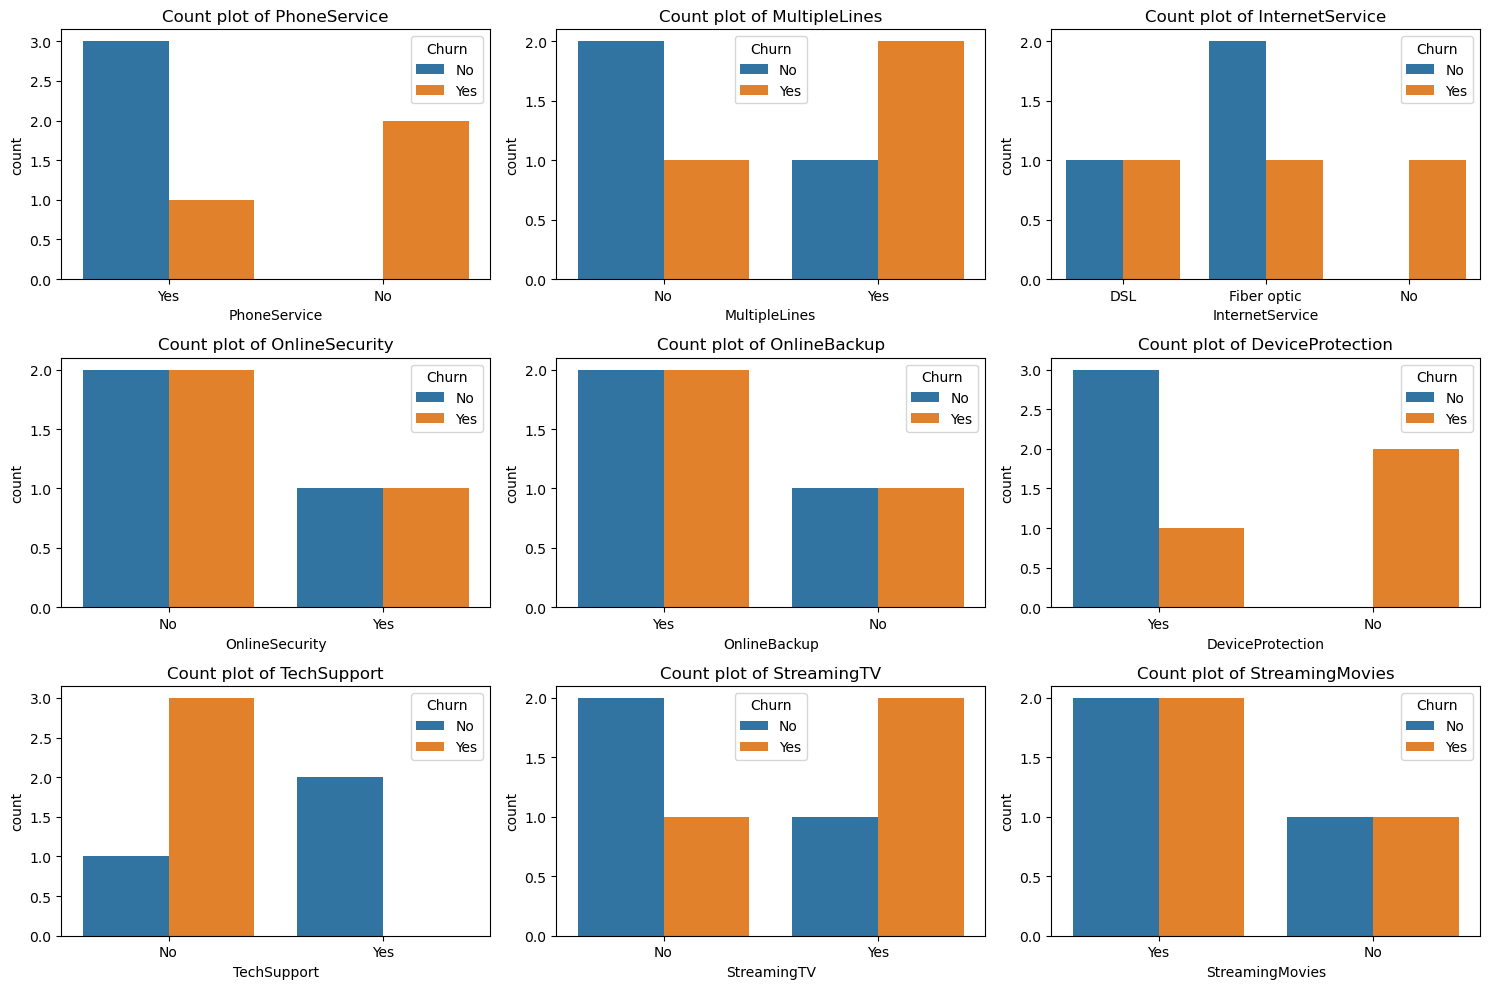

In [24]:
# Sample DataFrame creation with 'Churn' column added
data = {
    'PhoneService': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'MultipleLines': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'InternetService': ['DSL', 'Fiber optic', 'Fiber optic', 'DSL', 'Fiber optic', 'No'],
    'OnlineSecurity': ['No', 'Yes', 'No', 'No', 'Yes', 'No'],
    'OnlineBackup': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'DeviceProtection': ['Yes', 'No', 'Yes', 'No', 'Yes', 'Yes'],
    'TechSupport': ['No', 'No', 'Yes', 'No', 'Yes', 'No'],
    'StreamingTV': ['No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'StreamingMovies': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes']  # Adding Churn column
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the matplotlib figure
fig, axes = plt.subplots(3, 3, figsize=(15, 10))  # 3x3 grid for subplots

# List of columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Loop through each column and create a countplot with hue based on 'Churn'
for i, col in enumerate(columns):
    row = i // 3
    col_pos = i % 3
    sns.countplot(data=df, x=col, ax=axes[row, col_pos], hue='Churn')
    axes[row, col_pos].set_title(f'Count plot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


### The data shows that customers without key services like PhoneService, DeviceProtection, TechSupport, and OnlineSecurity are more likely to churn. Fiber optic internet users also have a higher churn rate compared to DSL. However, services like StreamingTV and StreamingMovies have less impact on churn.

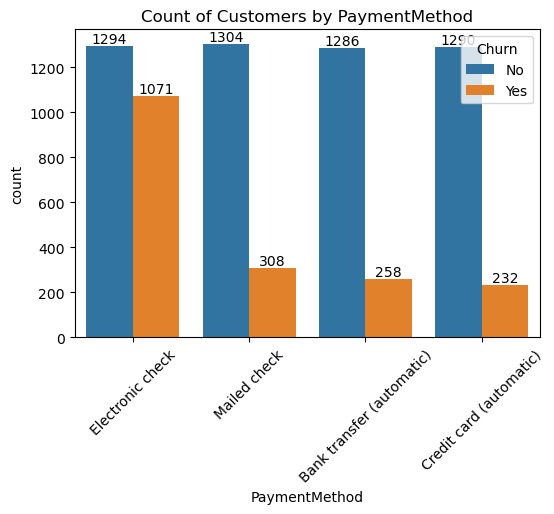

In [38]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df , hue = "Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Count of Customers by PaymentMethod")
plt.xticks(rotation = 45)
plt.show()

### Customer is lickely to churn when he using Electronic Check as a pyment methiod.